In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

C:\Users\sarah\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from dataloader import prepare_data, create_generators, visualize_images


# Select classes and prepare data
classes = ["Angelina Jolie", "Brad Pitt", "Denzel Washington",
           "Hugh Jackman", "Jennifer Lawrence"]
prepare_data(classes)

# Create data generators
train_dir = "train_data"
test_dir = "test_data"
train_generator, test_generator = create_generators(train_dir, test_dir)

Found 477 images belonging to 5 classes.
Found 177 images belonging to 5 classes.


In [6]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

Epoch 1/10


C:\Users\sarah\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 347ms/step - accuracy: 0.2055 - loss: 1.8231 - val_accuracy: 0.3051 - val_loss: 1.5577
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - accuracy: 0.3410 - loss: 1.5142 - val_accuracy: 0.4068 - val_loss: 1.3596
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.4525 - loss: 1.3110 - val_accuracy: 0.6497 - val_loss: 0.8929
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.5877 - loss: 1.0252 - val_accuracy: 0.7232 - val_loss: 0.7231
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.7569 - loss: 0.6224 - val_accuracy: 0.8418 - val_loss: 0.4639
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.8922 - loss: 0.3591 - val_accuracy: 0.9209 - val_loss: 0.2945
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.9524 - loss: 0.1701 - val_accuracy: 0.9322 - val_loss: 0.2309
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.9773 - loss: 0.1042 - val_accuracy: 0.9548 - val

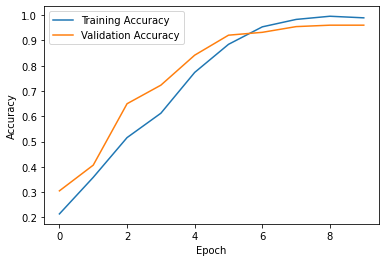

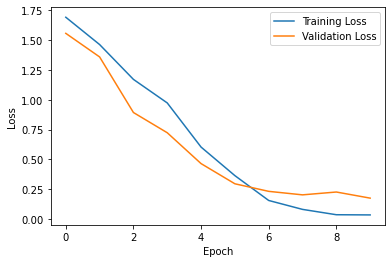

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
model.save("baseline_model.h5")  # Save the baseline model